## Explore the events dataset

In [1]:
# imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import sys
reload(sys)
sys.setdefaultencoding("utf-8")

import matplotlib.font_manager as fm
font = fm.FontProperties(fname='c:\\windows\\fonts\\simsun.ttc')

from mpl_toolkits.basemap import Basemap

In [2]:
events = pd.read_csv('events.csv')

In [3]:
events.head(10)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66
5,6,1476664663289716375,2016-05-01 00:27:21,0.00,0.00
6,7,5990807147117726237,2016-05-01 00:15:13,113.73,23.00
7,8,1782450055857303792,2016-05-01 00:15:35,113.94,34.70
8,9,-2073340001552902943,2016-05-01 00:15:33,0.00,0.00
9,10,-8195816569128397698,2016-05-01 00:41:31,119.34,26.04


In [4]:
events.shape

(3252950, 5)

### Datetime

In [5]:
events.timestamp = pd.to_datetime(events.timestamp)

In [6]:
events['time_year'] = events.timestamp.apply(lambda x: x.year)
events['time_month'] = events.timestamp.apply(lambda x: x.month)

In [7]:
events.time_year.value_counts()

2016    3252950
Name: time_year, dtype: int64

In [8]:
events.time_month.value_counts()

5    3251991
4        959
Name: time_month, dtype: int64

**So all the recorded evets took place in 2016, with the vast majority in May, and only 959 events in April.**

In [9]:
events['time_day'] = events.timestamp.apply(lambda x: x.day)

In [10]:
events.time_day.value_counts()

3     483293
5     478999
4     473487
6     471730
2     451546
7     448345
1     444589
30       959
8          2
Name: time_day, dtype: int64

In [11]:
events.time_day[events.time_month == 5].value_counts()

3    483293
5    478999
4    473487
6    471730
2    451546
7    448345
1    444589
8         2
Name: time_day, dtype: int64

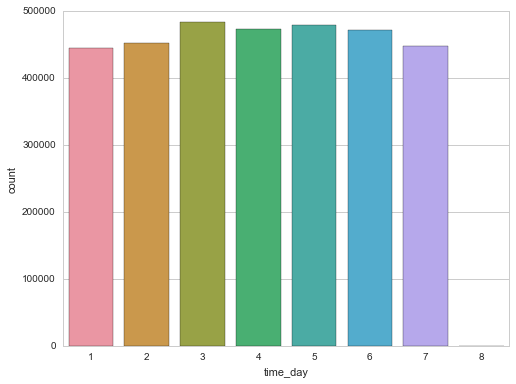

In [13]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

sns.countplot('time_day', data = events[events.time_month == 5])

In [16]:
events.time_day[events.time_month == 4].value_counts()

30    959
Name: time_day, dtype: int64

**So the recorded events were between 4/30/2016 to 5/8/2016.** 

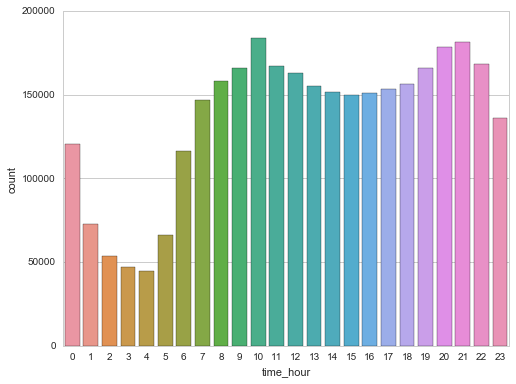

In [17]:
events['time_hour'] = events.timestamp.apply(lambda x: x.hour)

sns.countplot('time_hour', data = events)

**Fewer events were recorded between 0:00am to 6:00am.**

### Geolocations

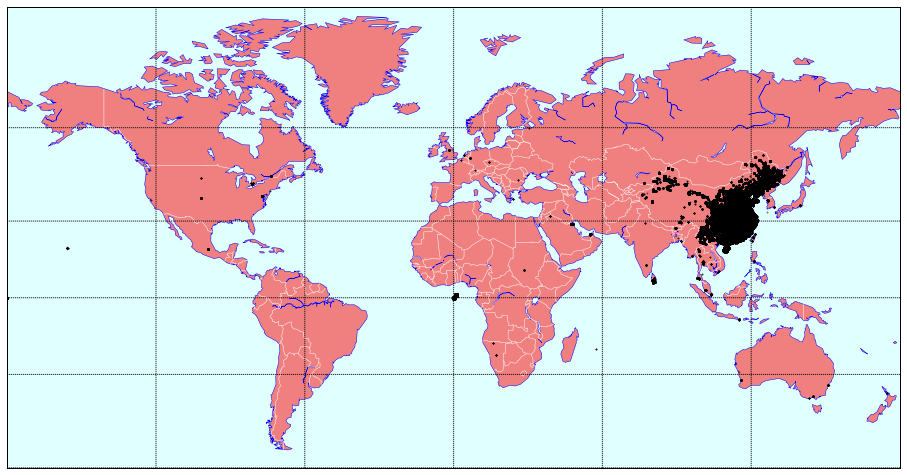

In [31]:
# Plot set up
plt.figure(1, figsize=(16, 12))

# World map using Miller Cylindrical Projection
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection = 'mill', llcrnrlat = -60, urcrnrlat = 85, \
            llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
m.drawcoastlines(linewidth = 0.5, color = "b")
m.drawcountries(linewidth = 0.5, color="w")
m.fillcontinents(color = 'lightcoral', lake_color = 'lightcyan')
m.drawmapboundary(fill_color = 'lightcyan')

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))

# Plot events using longtitude and latitude
xy = m(events["longitude"].tolist(), events["latitude"].tolist())
m.scatter(xy[0], xy[1], s = 2, c = 'black', alpha = 0.5, zorder = 2)

plt.show()

**Most of the data are from China. So we can zoom in to only look at China.**

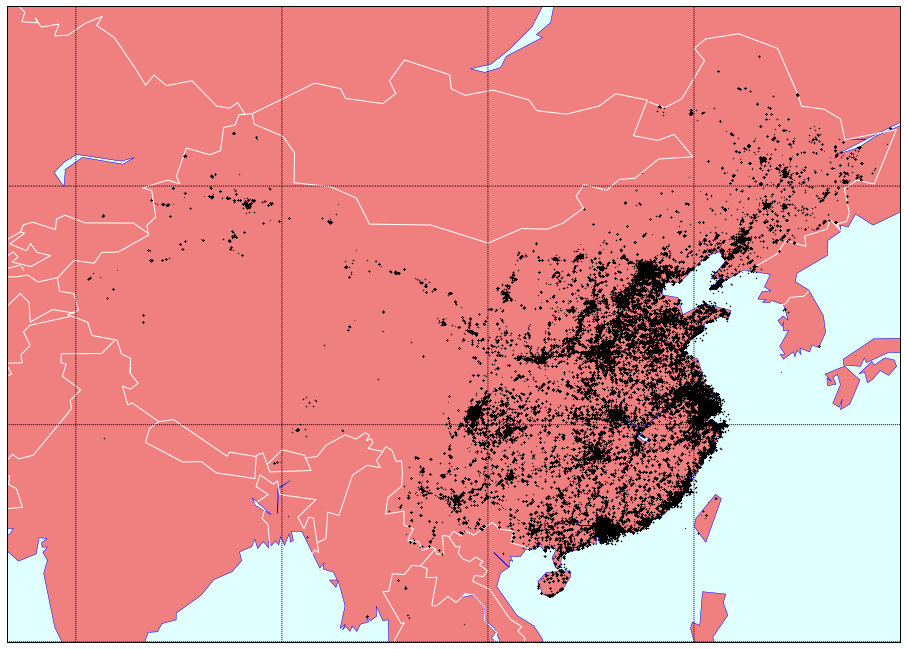

In [34]:
# Plot set up
plt.figure(1, figsize=(16, 12))

# Map of China using Miller Cylindrical Projection
# For China, the rough llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon are 15, 70, 55, 135
# resolution = 'c' means use crude resolution coastlines.
m1 = Basemap(projection = 'mill', llcrnrlat = 15, urcrnrlat = 55, \
            llcrnrlon = 70, urcrnrlon = 135, resolution = 'c')
m1.drawcoastlines(linewidth = 0.5, color = "b")
m1.drawcountries(linewidth = 1, color="w")
m1.fillcontinents(color = 'lightcoral', lake_color = 'lightcyan')
m1.drawmapboundary(fill_color = 'lightcyan')

# draw parallels and meridians.
m1.drawparallels(np.arange(15, 61., 15.))
m1.drawmeridians(np.arange(60.,136.,15.))

# Plot events using longtitude and latitude
xy = m1(events["longitude"].tolist(), events["latitude"].tolist())
m1.scatter(xy[0], xy[1], s = 1, c = 'black', alpha = 0.5, zorder = 2)

plt.show()

**Most of the data are from east China, especially the coastal areas and big cities such as Beijing, Shanghai, Hongkong.**